In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
# data 불러오기
df = pd.read_csv('data/online_commerce_data.csv')

In [3]:
df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
0,2021059651101,68.0,9,202106072433746,2021/06/07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910
1,2018069800502,49.0,2,202105311957155,2021/05/31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000
2,2019073300103,35.0,1,202105138020462,2021/05/13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400
3,2020075283364,41.0,9,202106171444319,2021/06/17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080
4,2020104780765,46.0,1,202106024431989,2021/06/02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610


In [4]:
# 데이터 분포 확인
df.describe()

,customer_no,age,gender,order_no,item_code,price,qty,order_amount,discount_amount,paid_amount
count,1.473110e+05,147273.000000,147311.000000,1.473110e+05,1.473110e+05,1.473110e+05,147311.000000,1.473110e+05,1.473110e+05,1.473110e+05
mean,2.019382e+12,48.080178,2.916001,2.021040e+14,3.219270e+08,9.059506e+04,1.510118,1.226036e+05,1.183722e+04,1.107664e+05
std,1.170078e+09,12.555535,2.807581,1.516741e+09,1.149283e+06,2.497701e+05,4.954752,3.899782e+05,5.353472e+04,3.532539e+05
min,2.015010e+12,15.000000,1.000000,2.021010e+14,3.200021e+08,1.200000e+02,1.000000,1.500000e+02,0.000000e+00,1.500000e+02
25%,2.018129e+12,38.000000,1.000000,2.021030e+14,3.210435e+08,3.900000e+03,1.000000,3.900000e+03,0.000000e+00,3.900000e+03
50%,2.019122e+12,47.000000,2.000000,2.021041e+14,3.222366e+08,3.090000e+04,1.000000,3.681000e+04,4.900000e+02,3.307000e+04
75%,2.020102e+12,57.000000,2.000000,2.021052e+14,3.226723e+08,6.490000e+04,1.000000,6.990000e+04,3.990000e+03,6.800000e+04
max,2.021070e+12,149.000000,9.000000,2.021062e+14,3.236732e+08,8.334000e+06,260.000000,3.603600e+07,2.017500e+06,3.603600e+07


In [5]:
# 결측치 확인
df.isnull().sum()

customer_no         0
age                38
gender              0
order_no            0
order_date          0
channel             0
item_category       0
item_code           0
item_name           0
price               0
qty                 0
order_amount        0
discount_amount     0
paid_amount         0
dtype: int64

In [6]:
# 나이 결측값 999세로 변경
df['age'] = df.age.fillna(999)
df.isnull().sum()

customer_no        0
age                0
gender             0
order_no           0
order_date         0
channel            0
item_category      0
item_code          0
item_name          0
price              0
qty                0
order_amount       0
discount_amount    0
paid_amount        0
dtype: int64

## **EDA**

In [7]:
# 나이 5세 단위로 범주화
# 나이의 최소값 : 15, 최대값 : 149
df['age_cat'] = pd.cut(df['age'], [0, 19, 29, 39, 49, 59, 69, 150, 1000], 
                            labels = ['< 20', '20 ~ 29', '30 ~ 39', '40 ~ 49', '50 ~ 59', '60 ~ 69', '≥ 70', 'Unknown'])

In [8]:
# 연령 별 채널 유입 고객 수 확인
customer_counts = df.groupby(['channel', 'age_cat'])['customer_no'].nunique().reset_index(name='count')
customer_counts 

,channel,age_cat,count
0,Mobile,< 20,73
1,Mobile,20 ~ 29,1660
2,Mobile,30 ~ 39,7677
3,Mobile,40 ~ 49,9302
4,Mobile,50 ~ 59,5126
5,Mobile,60 ~ 69,2561
6,Mobile,≥ 70,946
7,Mobile,Unknown,19
8,TV,< 20,12
9,TV,20 ~ 29,801


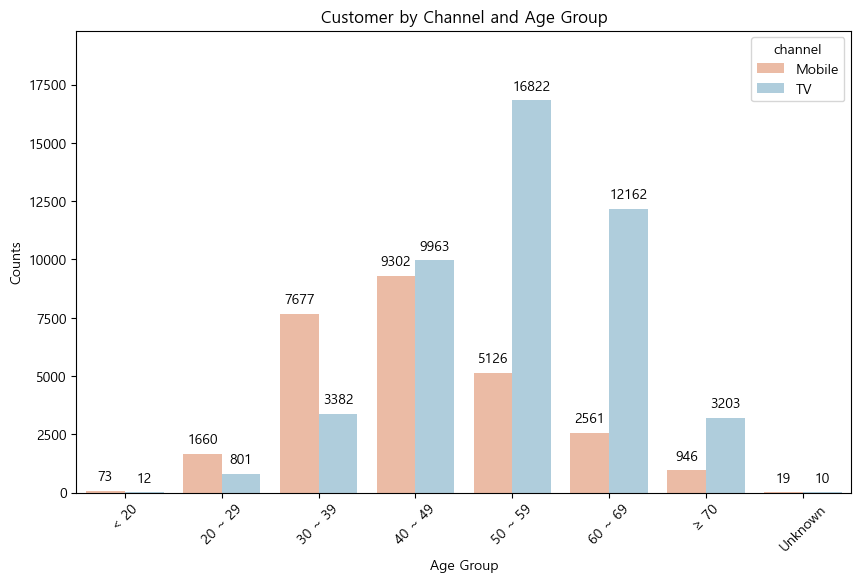

In [9]:
# 채널 별, 연령별 고객 수 시각화
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='age_cat', y='count', hue='channel', data=customer_counts, palette='RdBu')

# 막대 위에 count 수 표시
for p in barplot.patches:
    if p.get_height() > 0:  # count가 0보다 클 때만 라벨 표시
        barplot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points')

plt.title('Customer by Channel and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Counts')
plt.xticks(rotation=45)

# y 축 범위 조정
barplot.set_ylim(0, customer_counts['count'].max() + 3000)

plt.show()

In [10]:
# 시간형으로 변경
df['order_date'] = df['order_date'].str.replace('/', '-')
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')

# 구매 월 데이터 추출
df['month'] = df['order_date'].dt.month

In [11]:
# 월별 매출액, 할인율 그래프로
# 할인율 계산하기
df['discount_rate'] = round((df['discount_amount'] / df['order_amount']) * 100, 2)

In [12]:
# 월별 총 매출액, 평균 할인율 계산
monthly_summary = df.groupby(['month']).agg({'order_amount': 'sum', 'discount_rate': 'mean'}).reset_index()
monthly_summary['order_amount_million'] = monthly_summary['order_amount'] / 1e6
monthly_summary

,month,order_amount,discount_rate,order_amount_million
0,1,1684089610,4.492337,1684.08961
1,2,1886959410,4.034270,1886.95941
2,3,3461670720,4.177067,3461.67072
3,4,3560668710,4.097207,3560.66871
4,5,4093668200,5.659436,4093.66820
5,6,3373798410,5.993820,3373.79841


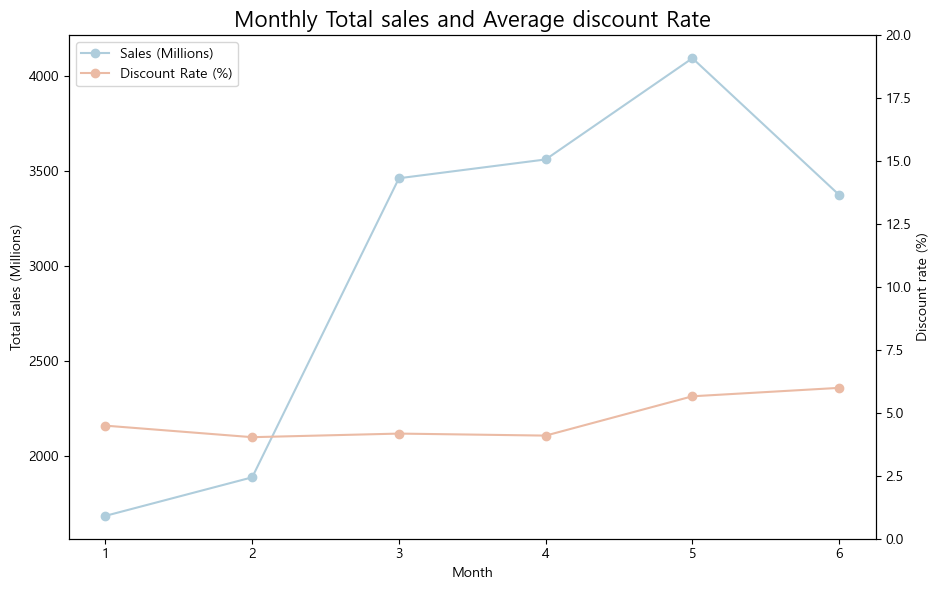

In [13]:
# 새 그래프 생성
fig, ax1 = plt.subplots(figsize=(9.5, 6))

# 매출액 꺾은선 그래프
ax1.plot(monthly_summary['month'], monthly_summary['order_amount_million'], color='#AFCDDC', marker='o', label='Sales (Millions)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total sales (Millions)')
ax1.tick_params(axis='y')

# 할인율 꺾은선 그래프 
ax2 = ax1.twinx()
ax2.plot(monthly_summary['month'], monthly_summary['discount_rate'], color='#EBBBA5', marker='o', label='Discount Rate (%)')
ax2.set_ylabel('Discount rate (%)')
ax2.tick_params(axis='y')

# 할인율 축의 범위를 0~20%로 설정
ax2.set_ylim(0, 20)

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes, fontsize='medium')
plt.title('Monthly Total sales and Average discount Rate', fontsize=16)

plt.tight_layout()  # 레이아웃 조정
plt.show()

In [14]:
# 채널별 매출액
# 월별 총 매출액, 평균 할인율 계산
monthly_channel = (df.groupby(['month', 'channel'])['order_amount'].sum()/1e6).reset_index()

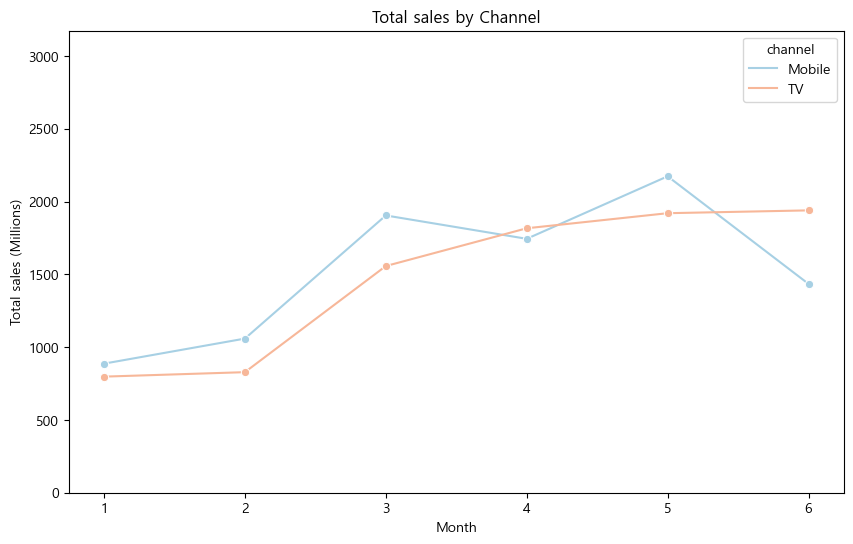

In [15]:
# 채널 별, 연령별 고객 수 시각화
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(x='month', y='order_amount', hue='channel', data=monthly_channel, palette='RdBu_r', marker='o')

plt.title('Total sales by Channel')
plt.xlabel('Month')
plt.ylabel('Total sales (Millions)')

# y 축 범위 조정
lineplot.set_ylim(0, monthly_channel['order_amount'].max() + 1000)

plt.show()

In [16]:
# 카테고리별 총 매출
category_sales = (df.groupby('item_category')['order_amount'].sum()/1e6).sort_values(ascending=False).reset_index()

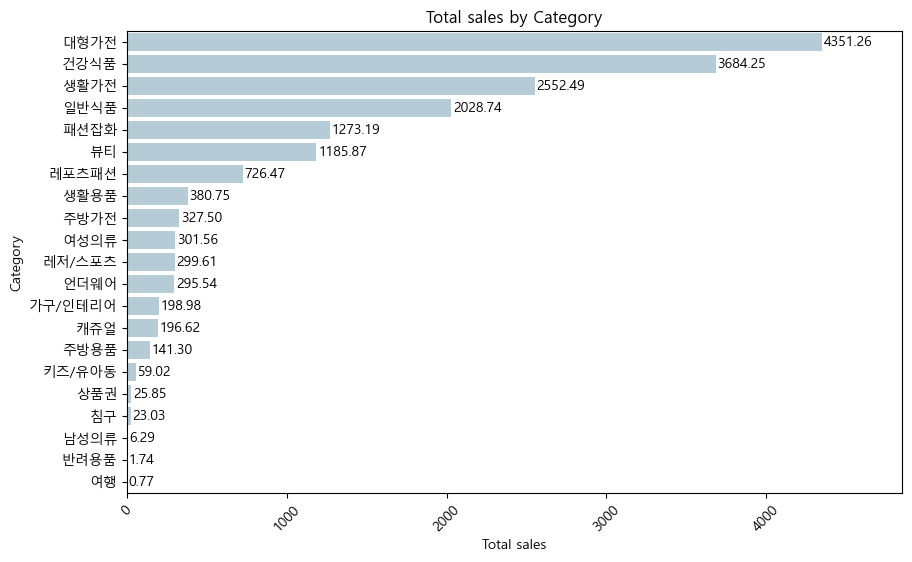

In [17]:
# 카테고리 별, 연령별 고객 수 시각화
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='order_amount', y='item_category', data=category_sales, color='#AFCDDC', orient='h')

# 막대 오른쪽에 값 표시
for i, (value, category) in enumerate(zip(category_sales['order_amount'], category_sales['item_category'])):
    barplot.text(value + 10, i, s=f'{value:.2f}', va='center')

plt.title('Total sales by Category')
plt.xlabel('Total sales')
plt.ylabel('Category')
plt.xticks(rotation=45)

# x 축 범위 조정
barplot.set_xlim(0, category_sales['order_amount'].max() + 500)

plt.show()

In [19]:
# 월별, 연령별 월 매출액
monthly_age = (df.groupby(['month', 'age_cat']).agg({'order_amount': 'sum', 'order_no': 'count'})).reset_index()

# 연령을 알 수 없는 경우 제외
monthly_age = monthly_age.loc[monthly_age['age_cat'] != 'Unknown']

# 연령별 인당 구매 금액 계산
monthly_age['sales_per_person'] = (monthly_age['order_amount'] / monthly_age['order_no']) / 10000

# 총 매출액 백만 단위
monthly_age['order_amount_million'] = monthly_age['order_amount'] / 1e6

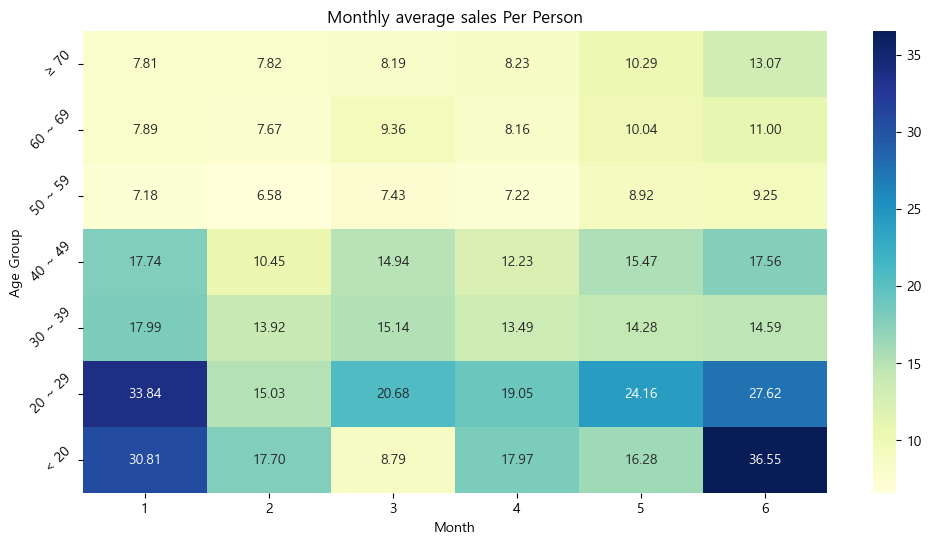

In [20]:
# 월과 연령대별로 1인 평균 매출액을 집계하는 피벗 테이블 생성
pivot_table = monthly_age.pivot(index="age_cat", columns="month", values="sales_per_person")

# 히트맵 생성
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Monthly average sales Per Person")
plt.xlabel("Month")
plt.ylabel("Age Group")
plt.yticks(rotation=45)
plt.gca().invert_yaxis()

plt.show()

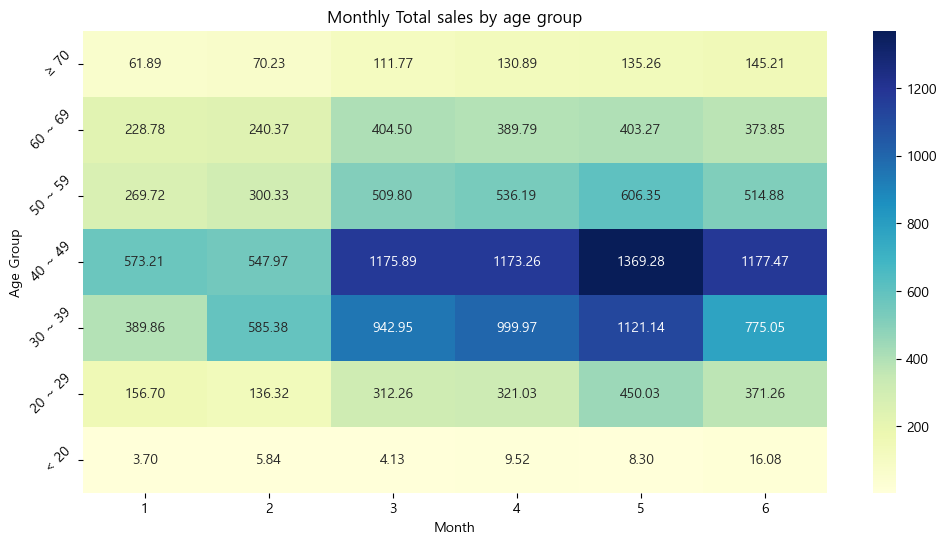

In [21]:
# 월과 연령대별로 총 매출액을 집계하는 피벗 테이블 생성
pivot_table = monthly_age.pivot(index="age_cat", columns="month", values="order_amount_million")

# 히트맵 생성
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Monthly Total sales by age group")
plt.xlabel("Month")
plt.ylabel("Age Group")
plt.yticks(rotation=45)
plt.gca().invert_yaxis()

plt.show()

In [22]:
# 10대가 가장 많이 사는 물건 카테고리는?
# 40대가 가장 많이 사는 물건 카테고리는?
age_category = (df.groupby(['age_cat', 'item_category'])['order_no'].count()).reset_index()
category_10 = age_category.loc[age_category['age_cat'] == '< 20'].sort_values(by='order_no', ascending=False)
category_40 = age_category.loc[age_category['age_cat'] == '40 ~ 49'].sort_values(by='order_no', ascending=False)

In [23]:
# 10대의 top 5 카테고리
category_10.head(5)

,age_cat,item_category,order_no
14,< 20,일반식품,129
3,< 20,대형가전,30
11,< 20,언더웨어,24
19,< 20,키즈/유아동,12
10,< 20,생활용품,11


In [24]:
# 40대의 top 5 카테고리
category_40.head(5)

,age_cat,item_category,order_no
77,40 ~ 49,일반식품,21558
64,40 ~ 49,건강식품,3321
74,40 ~ 49,언더웨어,2843
73,40 ~ 49,생활용품,2678
68,40 ~ 49,레포츠패션,2631


## **연관성 분석을 통한 상품 추천**

In [25]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [26]:
# 연관 규칙 분석에 필요한 컬럼만 선택하여 다시 객체 지정하기
# 각 고객들이 구매한 품목을 하나의 장바구니로 정의
association_df = df[['customer_no', 'item_code', 'item_name']]
association_df.head()

,customer_no,item_code,item_name
0,2021059651101,323421750,밴딩팬츠
1,2018069800502,323516657,트랙수트
2,2019073300103,323393459,기초세트
3,2020075283364,323420069,유산균
4,2020104780765,321820178,건강주스


In [27]:
# apriori 모델 적용을 위한 품목 리스트 가공
itemset = association_df.drop_duplicates(['customer_no', 'item_name']).groupby(['customer_no'])['item_name'].apply(list)
itemset = pd.DataFrame(itemset).reset_index().drop(['customer_no'], axis = 'columns')

# 중복 항목 제거
itemset = itemset.squeeze()

itemset.head()

0                    [도가니탕, 혈당/혈압측정기]
1                              [이온음료]
2    [닭고기(계육), 크리스피롤, 오메가3, 도가니탕, 사과]
3                               [유산균]
4                              [기모팬츠]
Name: item_name, dtype: object

In [28]:
# apriori 모델 적용을 위해 One-hot vector로 변형
encoder = TransactionEncoder()
encoder_T = encoder.fit(itemset).transform(itemset)

# 데이터프레임으로 변경
itemset_matrix = pd.DataFrame(encoder_T, columns=encoder.columns_)

itemset_matrix.head()

,18K쥬얼리,18K쥬얼리세트,2-4단 서랍장/협탁,2-5인용텐트,2구 가스레인지,2구 이상 전기레인지,7부/9부/크롭,DIY반제품,IH압력밥솥,LA갈비,...,후라이팬24-26cm,후라이팬28cm이상,후라이팬2종세트,후라이팬세트,후지필름,훌라후프,훌라후프/짐볼,휴대폰 거치대,흑미,흑염소즙
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# 지지도 0.001 기준으로 apriori 적용
itemset_apriori = apriori(itemset_matrix, min_support = 0.001, use_colnames=True)
itemset_apriori.head()

,support,itemsets
0,0.001568,(IH압력밥솥)
1,0.009006,(LA갈비)
2,0.001804,(LED TV)
3,0.001887,(가글/치약)
4,0.005010,(가죽재킷)


In [46]:
# 향상도 1 이상인 것만 추출
rules = association_rules(itemset_apriori, metric="lift", min_threshold=1)

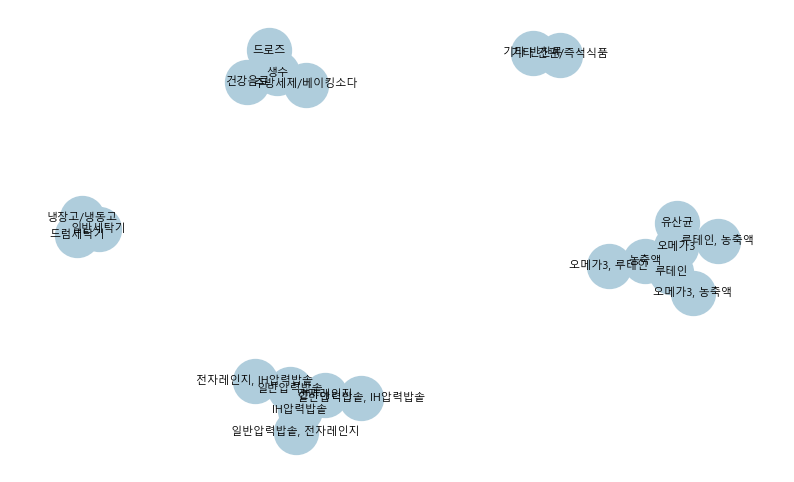

In [45]:
# 특정 아이템 시각화 하기 (생수)
fig, ax = plt.subplots(figsize=(10, 6))

# 그래프 생성
GA = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')

# 각 노드에 대한 레이블 설정 (frozenset 제거)
labels = {node: ', '.join(list(node)) for node in GA.nodes}

# 레이아웃 설정
pos = nx.spring_layout(GA)

# 그래프 그리기
nx.draw(GA, pos, with_labels=False, node_size=1000, node_color='#AFCDDC')
nx.draw_networkx_labels(GA, pos, labels=labels, font_family='Malgun Gothic', font_size=8, verticalalignment='center', horizontalalignment='center')

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.show()